# Extending the Solow Model: Malthusian Equilibrium: Lecture Support

* 
* <https://www.icloud.com/keynote/00i6ISzCAwi5sJNgFtexWEpjA> 

## Malthusian Growth: Making Population Growth Responsive

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

## Setting up the Python/Jupyter environment

In [1]:
%%javascript

IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;}

<IPython.core.display.Javascript object>

In [2]:
# ABOVE CELL IS "NO SCROLLING SUBWINDOWS" SETUP
#
# keep output cells from shifting to autoscroll: little scrolling
# subwindows within the notebook are an annoyance...

In [3]:
# THIS CELL LOADS THE LIBRARIES
#
# set up the environment by reading in every library we might need: 
# os... graphics... data manipulation... time... math... statistics...

import sys
import os
from urllib.request import urlretrieve

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image

import pandas as pd
from pandas import DataFrame, Series
from datetime import datetime

import scipy as sp
import numpy as np
import math
import random

import seaborn as sns
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
# PRETTIER GRAPHICS SETUP
#
# graphics setup: seaborn-whitegrid and figure size;
# graphs in the notebook itself...

%matplotlib inline 

plt.style.use('seaborn-whitegrid')

figure_size = plt.rcParams["figure.figsize"]
figure_size[0] = 12
figure_size[1] = 10
plt.rcParams["figure.figsize"] = figure_size

In [5]:
# THIS CELL IS THE KEY TO THE OKPY.ORG AUTOGRADER SYSTEM
#
# Don't change this cell; just run it. 
# The result will give you directions about how to log in to the submission system, called OK.
# Once you're logged in, you can run this cell again, but it won't ask you who you are because
# it remembers you. However, you will need to log in once per assignment.

!pip install -U okpy

from client.api.notebook import Notebook

ok = Notebook('ps6.ok')
_ = ok.auth(force=True, inline=True)

Requirement already up-to-date: okpy in /anaconda3/lib/python3.6/site-packages (1.13.11)
Requirement not upgraded as not directly required: coverage==3.7.1 in /anaconda3/lib/python3.6/site-packages (from okpy) (3.7.1)
Requirement not upgraded as not directly required: requests==2.12.4 in /anaconda3/lib/python3.6/site-packages (from okpy) (2.12.4)
distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Assignment: PS6 Notebook
OK, version v1.13.11


Open the following URL:

https://okpy.org/client/login/

After logging in, copy the code from the web page and paste it into the box.
Then press the "Enter" key on your keyboard.

Paste your code here: 


ERROR  | auth.py:91 | {'error': 'invalid_grant'}


---------------------------------------------------------------------
Authentication error: invalid grant
---------------------------------------------------------------------


### ⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎⬆︎
### RUN THESE CELLS ABOVE FIRST

# Problem Set 6 (Due Sep 28 11:59:59 PM)

## Introduction

The autograder, both in the tests you run along the way as you work on the problem set and in calculating the final score, looks in the same directory as the problem set notebook for an "ok.tests" directory, and then runs the tests in the "q\*\*.py" files in that directory (where "\*\*" denotes a two-digit number, possibly with a leading zero). Those tests take the form of comparing a variable that should be in your namespace and seeing if it is close to some desired value that we get when we do the problem set.

Thus while the problem set instructions ask you to run simulations and plot graphs, what you are tested on is whether the appropriate variables in your namespace have (close to the) right values. We do not care what code you use in order to get those variables to the right values. 

You can run simulations and then pick appropriate values out by slicing a series in order to get the right number. You can use your knowledge of the algebraic solution to the model to have Python calculate the answer, having first set the parameters to the right values. 
You can even do all of the calculations on pen and paper, and simply code up the variables.
    
Perhaps we should ask you to do all three—start with simulations, or with algebraic equations with set parameter values, or with full pen-and-paper calculations with only the final results entered into the notebook—and then ask you to check your results from one mode by doing the other two. But: _ars longa, vita brevis_. Focus on what works _for you_: the key is to get a sense of how economists' center-of-gravity analyses of long-run growth work, so that when you encounter such an analysis later, outside the university, you have the right intellectual panoply to evaluate it.

----

&nbsp;

### (Task A) Checking the "sgm_malthus" Function

The code cell immediately below, "HERE WE HAVE A FIRST FUNCTION", requires four inputs. In order:

* L0: the initial level of the labor force
* E0: the initial level of the efficiency-of-labor
* initial_year: the initial calendar year of the civilization corresponding to t=0
* T: the number of years for which the simulation will run.

Plus it can have:

* n: labor-force growth rate (default value: 0)
* g: efficiency-of-labor growth rate (default value: 0)
* s: savings-investment rate (default value: 0.15) 
* alpha: orientation-of-growth-toward-capital parameter $ \alpha $ (default value: 0.5)
* delta: deprecation rate on capital parameter $ \delta $ (default value: 0.05)
* Delta_s=0, Delta_g=0, Delta_n=0: differentials for alternative scenarios (default values: 0)
* graphs: graphs plotted (default value: "LEVELS"; alternatives: "LOGS", "NONE")
* remind: remind us of parameter values for the baseline and alternative scenarios (YES/NO)

Add a code cell to run this function. Check to make sure that it works. Check to make sure that, starting in 8000 BC with an initial labor force of 2.5 (million) (and thus a population of 5 million), with a population/labor-force growth rate n = 0.000440796, you get a labor force of 85 (million) (and thus a population of 170 million) as of year zero. (It will take a while to run: a couple of minutes, perhaps.)

Then set the variable:

>LF_year0

to the year-0 value of the labor force you get.

In [6]:
# HERE WE HAVE A FIRST FUNCTION 
# (NOTE THAT IF YOU START RUNNING IT IN 8000 BC, IT WILL
# WILL TAKE A LONG TIME TO RUN)
#
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN MALTHUSIAN SIMULATIONS
#
# might as well put "check that common libraries are active"
# as a default header in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and base conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its base
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the base and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...
# 
# The function requires four inputs. In order:
# 
# * L0: the initial level of the labor force
# * E0: the initial level of the efficiency-of-labor
# * initial_year: the initial calendar year of the civilization corresponding to t=0
# * T: the number of years for which the simulation will run.
# 
# Plus it can have:
# 
# * n: labor-force growth rate (default value: 0)
# * g: efficiency-of-labor growth rate (default value: 0)
# * s: savings-investment rate (default value: 0.15) 
# * alpha: orientation-of-growth-toward-capital parameter $ \alpha $ (default value: 0.5)
# * delta: deprecation rate on capital parameter $ \delta $ (default value: 0.05)
# * Delta_s=0, Delta_g=0, Delta_n=0: differentials for alternative scenarios (default values: 0)
# * graphs: graphs plotted (default value: "LEVELS"; alternatives: "LOGS", "NONE")
# * remind: remind us of parameter values for the baseline and alternative scenarios (YES/NO)

def sgm_malthus_10000yr_run(L0, E0, initial_year, T , n=0.000, g=0.00, s=0.15, 
    alpha=0.5, delta=0.05, Delta_s=0, Delta_g=0, Delta_n=0, graphs="LEVELS", remind = "YES"):

    sg_df = pd.DataFrame(index=range(T),columns=['Year',
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'Population',
        'BGP_base_Labor',
        'BGP_base_Efficiency',
        'BGP_base_Output',
        'BGP_base_Output_per_Worker',
        'BGP_base_Capital_Output_Ratio',
        'BGP_base_Capital',
        'BGP_base_Population',
        'BGP_alt_Labor',
        'BGP_alt_Efficiency',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio',
        'BGP_alt_Capital',
        'BGP_alt_Population'],
        dtype='float')

    sg_df.Year[0] = initial_year
    sg_df.Labor[0] = L0
    sg_df.Population[0] = 2 * L0
    sg_df.BGP_base_Labor[0] = L0
    sg_df.BGP_base_Population[0] = 2 * sg_df.BGP_base_Labor[0]
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_base_Efficiency[0] = E0
    sg_df.BGP_alt_Efficiency[0] = E0
    sg_df.BGP_alt_Population[0] = 2 * sg_df.BGP_alt_Labor[0]

    KoverY_base_steady_state = s/(n+g+delta)
    YoverL_base_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_base_steady_state = (YoverL_base_steady_state *
        KoverY_base_steady_state)
    
    sg_df.Capital[0] = KoverL_base_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_base_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_base_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_base_Output[0] = sg_df.BGP_base_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_base_Capital[0] = sg_df.BGP_base_Output[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0])
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.BGP_alt_Output[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0])
    
    for i in range(T):
        sg_df.Year[i+1] = sg_df.Year[i]+1
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Population[i+1] = 2 * sg_df.Labor[i+1]
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])

    for i in range(T):
        sg_df.BGP_base_Labor[i+1] = (sg_df.BGP_base_Labor[i] * np.exp(n))
        sg_df.BGP_base_Population[i+1] = 2 * sg_df.BGP_base_Labor[i+1]
        sg_df.BGP_base_Efficiency[i+1] = (sg_df.BGP_base_Efficiency[i] * np.exp(g))
        sg_df.BGP_base_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_base_Output_per_Worker[i+1] = sg_df.BGP_base_Efficiency[i+1] * (
            sg_df.BGP_base_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_base_Output[i+1] = (sg_df.BGP_base_Output_per_Worker[i+1] * 
            sg_df.BGP_base_Labor[i+1])
        sg_df.BGP_base_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])

    for i in range(T):
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n + Delta_n))
        sg_df.BGP_alt_Population[i+1] = 2 * sg_df.BGP_alt_Labor[i+1]
        sg_df.BGP_alt_Efficiency[i+1] = (sg_df.BGP_alt_Efficiency[i] * np.exp(g+Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Efficiency[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Efficiency[i+1] * sg_df.BGP_alt_Labor[i+1])  

    sg_df.Population = 2 * sg_df.Labor
    
    sg_df = sg_df.set_index("Year")
        
    if (graphs == "LEVELS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        sg_df.BGP_base_Labor.plot(ax = ax1, title = "BGP (base) Labor")
        sg_df.BGP_alt_Labor.plot(ax = ax1, title = "BGP (alt) Labor")
        sg_df.Labor.plot(ax = ax1, title = "Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        sg_df.BGP_base_Efficiency.plot(ax = ax2, title = "BGP (base) Efficiency")
        sg_df.BGP_alt_Efficiency.plot(ax = ax2, title = "BGP (alt) Efficiency")
        sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        sg_df.BGP_base_Capital.plot(ax = ax3, title = "BGP (base) Capital Stock")
        sg_df.BGP_alt_Capital.plot(ax = ax3, title = "BGP (alt) Capital Stock")
        sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        sg_df.BGP_base_Output.plot(ax = ax4, title = "BGP (base) Output")
        sg_df.BGP_alt_Output.plot(ax = ax4, title = "BGP (alt) Output")
        sg_df.Output.plot(ax = ax4, title = "Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        sg_df.BGP_base_Output_per_Worker.plot(ax = ax5, title = "BGP (base) Output per Worker")
        sg_df.BGP_alt_Output_per_Worker.plot(ax = ax5, title = "BGP (alt) Output per Worker")
        sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Levels: Simulation Run', size = 20)

        plt.show()
        
    if (graphs == "LOGS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        np.log(sg_df.BGP_base_Labor).plot(ax = ax1, title = "BGP (base) Labor")
        np.log(sg_df.BGP_alt_Labor).plot(ax = ax1, title = "BGP (alt) Labor")
        np.log(sg_df.Labor).plot(ax = ax1, title = "Log Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        np.log(sg_df.BGP_base_Efficiency).plot(ax = ax2, title = "BGP (base) Efficiency")
        np.log(sg_df.BGP_alt_Efficiency).plot(ax = ax2, title = "BGP (alt) Efficiency")
        np.log(sg_df.Efficiency).plot(ax = ax2, title = "Log Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        np.log(sg_df.BGP_base_Capital).plot(ax = ax3, title = "BGP (base) Capital Stock")
        np.log(sg_df.BGP_alt_Capital).plot(ax = ax3, title = "BGP (alt) Capital Stock")
        np.log(sg_df.Capital).plot(ax = ax3, title = "Log Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        np.log(sg_df.BGP_base_Output).plot(ax = ax4, title = "BGP (base) Output")
        np.log(sg_df.BGP_alt_Output).plot(ax = ax4, title = "BGP (alt) Output")
        np.log(sg_df.Output).plot(ax = ax4, title = "Log Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        np.log(sg_df.BGP_base_Output_per_Worker).plot(ax = ax5, title = "BGP (base) Output per Worker")
        np.log(sg_df.BGP_alt_Output_per_Worker).plot(ax = ax5, title = "BGP (alt) Output per Worker")
        np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Log Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Logs: Simulation Run', size = 20)

        plt.show()
    
    if ((graphs != "LEVELS") and (graphs != "LOGS")):
        fig = "NONE"
        
    if (remind == "YES"):      
        print("The blue line is the initial balanced-growth path;")
        print("the orange line is the alternative balanced growth path;")
        print("the green line is the track of the economy as it transitions")
        print("from the baseline to the alternative BGP.")
        print(" ")
    
        print(n, "is the baseline labor-force growth rate")
        print(g, "is the baseline efficiency-of-labor growth rate")
        print(s, "is the baseline savings rate")
        print(" ")
          
        print(n + Delta_n, "is the alternative labor-force growth rate")
        print(g + Delta_g, "is the alternative efficiency-of-labor growth rate")
        print(s + Delta_s, "is the alternative savings-investment rate")
        print(" ")
    
        print(delta, "is the depreciation rate")
        print(alpha, "is the orientation-of-growth-toward-capital parameter")
    
    
    SGM_dict = {}
    SGM_dict["df"] = sg_df
    SGM_dict["plots"] = fig
    
    return SGM_dict

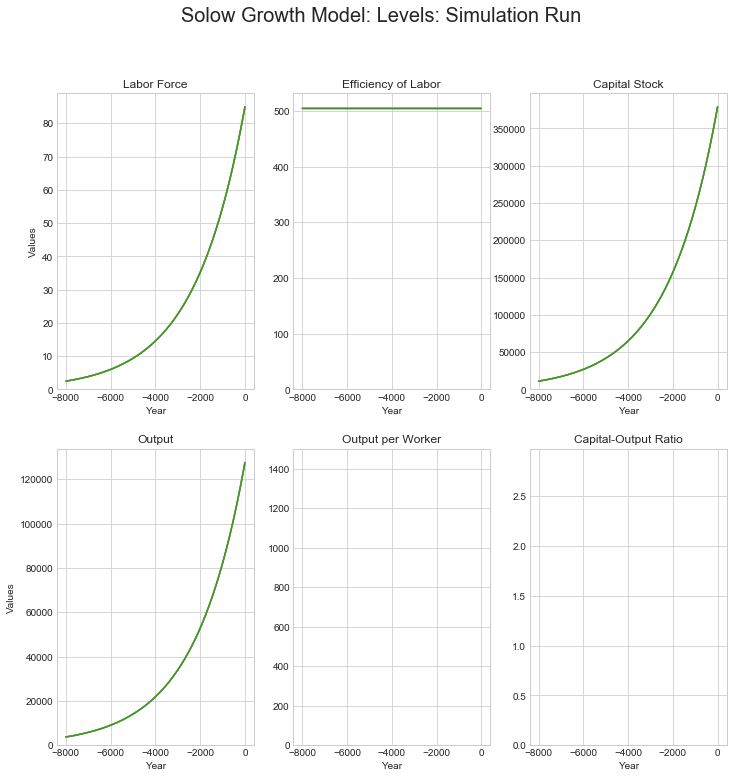

The blue line is the initial balanced-growth path;
the orange line is the alternative balanced growth path;
the green line is the track of the economy as it transitions
from the baseline to the alternative BGP.
 
0.000440796 is the baseline labor-force growth rate
0.0 is the baseline efficiency-of-labor growth rate
0.15 is the baseline savings rate
 
0.000440796 is the alternative labor-force growth rate
0.0 is the alternative efficiency-of-labor growth rate
0.15 is the alternative savings-investment rate
 
0.05 is the depreciation rate
0.5 is the orientation-of-growth-toward-capital parameter
 
 
 
85.00063541004909  = Labor Force in Year 0


In [7]:
output = sgm_malthus_10000yr_run(L0=2.5, E0=504.41000009638856, initial_year = -8000,
    T = 8001, n = 0.000440796 , graphs = "LEVELS")

print(" ")
print(" ")
print(" ")
print(output["df"].Labor[0], " = Labor Force in Year 0")

LF_year0 = output["df"].Labor[0]

In [ ]:
ok.grade('q06')

### (Task B) Projecting from Year 0 to 2018

Now calculate what the labor force would be today starting from a labor force of 85 million at the year zero if we had had the same labor force-growth rate that was seen from 8000 BC to the year 0: 0.0440796% per year. Set the variable:

>LF_year0

to the value you calculate for the counterfactual alternative global labor force in 2018.

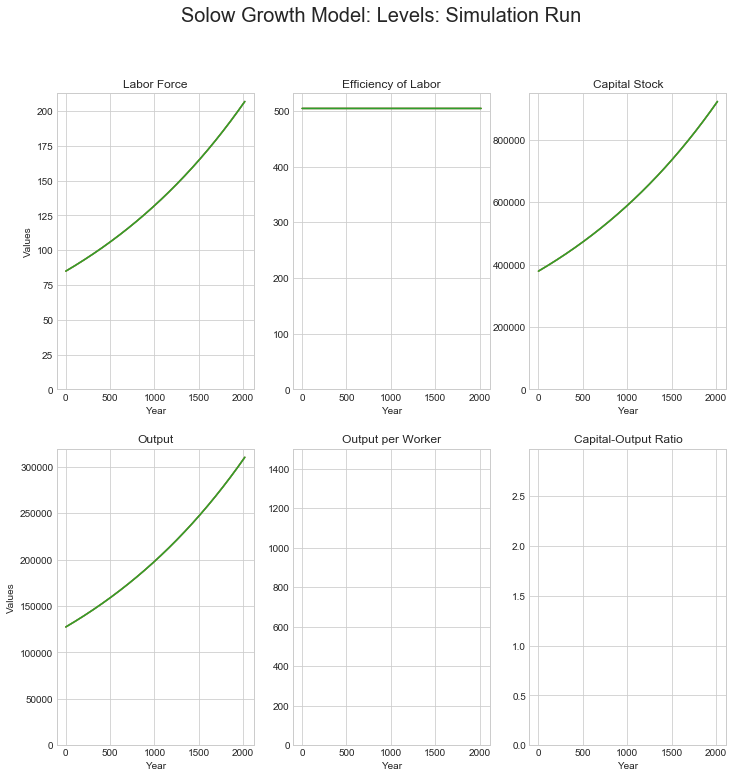

 
 
 
206.88800009399387  = Labor Force in Year 2018


In [8]:
output = sgm_malthus_10000yr_run(L0=85, E0=504.41000009638856, initial_year = 0,
    T = 2019, n = 0.000440796 , graphs = "LEVELS", remind = "NO")

print(" ")
print(" ")
print(" ")
print(output["df"].Labor[2018], " = Labor Force in Year 2018")

LF_year0 = output["df"].Labor[2018]

# output["df"]

### (Task C) When Does Population Begin to Exceed the Projection?

Now calculate what the labor force would be along the way from year 0 to 2000, starting from a labor force of 85 million at the year zero if we had had the same labor force-growth rate that was seen from 8000 BC to the year 0: 0.0440796% per year. Look at the populations in 500, 1000, and 1500. Set the variables:

>LF_year500   
LF_year1000   
LF_year_1500   

to the values you calculate for the counterfactual alternative global labor force along the way from the year zero.

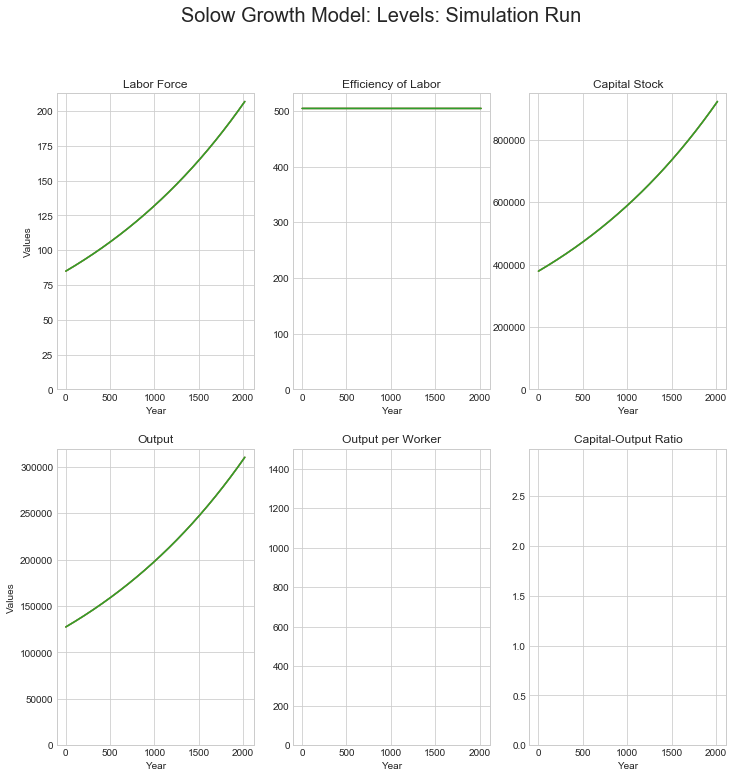

 
 
 
85.0  = Labor Force in Year 0
105.95868526564027  = Labor Force in Year 500
132.08521156732968  = Labor Force in Year 1000
164.6538277730378  = Labor Force in Year 1500


In [9]:
output = sgm_malthus_10000yr_run(L0=85, E0=504.41000009638856, initial_year = 0,
    T = 2019, n = 0.000440796 , graphs = "LEVELS", remind = "NO")

print(" ")
print(" ")
print(" ")
print(output["df"].Labor[0], " = Labor Force in Year 0")
print(output["df"].Labor[500], " = Labor Force in Year 500")
print(output["df"].Labor[1000], " = Labor Force in Year 1000")
print(output["df"].Labor[1500], " = Labor Force in Year 1500")

LF_year500 = output["df"].Labor[500]
LF_year1000 = output["df"].Labor[1000]
LF_year_1500 = output["df"].Labor[1500]

# output["df"]

Compare with the estimates compiled by Michael Kremer (1993): Population Growth and Technological Change, One Million BC to 1990 <http://www.jstor.org/stable/2118405>:

<img src="https://www.evernote.com/l/AAGHKO8RP2tL6IPf-f8aUiFREjJ9Ec606ZYB/image.png" title="2^20BC" alt="2^20BC" width="600" />
<img src="https://www.evernote.com/l/AAHE3w47j0JKGqu8sxrsb7Feg8Qi0H36e2kB/image.png" title="2^20BC" alt="2^20BC" width="600" />
<img src="https://www.evernote.com/l/AAEmqWSeJS9OOZ9BHnhmf49bkQuN1B7xHDkB/image.png" title="2^20BC" alt="2^20BC" width="600" />

----

<img src="https://www.evernote.com/l/AAEK8kY-HjlLwaE1NqRo6K1Oir5yVvu4r0AB/image.png" title="Thomas" alt="Thomas" width="600" />
<img src="https://www.evernote.com/l/AAHUoK54JatP5rVJkfAsWw3uCC76lQWc5qgB/image.png" title="Sue" alt="Sue" width="600" />
<img src="https://www.evernote.com/l/AAGlNQfZ-ftOE74d2yZnD9gD-grNcvu8bvEB/image.png" title="Herryhausen" alt="Herryhausen" width="600" />
<img src="https://www.evernote.com/l/AAH7BwC3f5hNFKOC4GTBslpC-L-WHZBGQOsB/image.png" title="on the set" alt="on the set" width="600" />

----

<img src="https://www.evernote.com/l/AAGZJ7hjlAJAII3bIET_yik5oiWLcLERZxAB/image.png" title="Kremer-PopGr&TechCh" alt="Kremer-PopGr&TechCh" width="600" />   
<img src="https://www.evernote.com/l/AAFIKygXlVFByJLIXKmJh3MH_Jpt2AAnNfIB/image.png" title="Kremer-PopGr&TechCh-Table1Head" alt="Kremer-PopGr&TechCh-Table1Head" width="600" />      
<img src="https://www.evernote.com/l/AAEts0AlIW9I96caU2jJVQISJRNidyDM-WcB/image.png" title="Kremer-PopGr&TechCh-0-1500" alt="Kremer-PopGr&TechCh-0-1500" width="600" /> 

I favor higher estimates for world population as of 1500—500 rather than 425 million. But if we make the heroic assumption that population is twice the labor force then, in both my and in Michael Kremer's view at least, the trend seems to lag behind, no? After 1500 that things start to diverge...

----

&nbsp;

### (Task C) Making The Efficiency of Labor Depend on Population Pressure

In [10]:
# HERE WE HAVE A SECOND MALTHUSIAN FUNCTION
#
# MAKING THE RATE OF GROWTH OF THE EFFICIENCY OF LABOR
# DEPEND ON THE RATE OF GROWTH OF THE STOCK OF USEFUL
# KNOWLEDGE AND THE RATE OF GROWTH OF POPULATION
#
# FUNCTION FOR CALCULATING AND GRAPHING THE LEVELS OF 
# SOLOW GROWTH MODEL VARIABLES IN MALTHUSIAN SIMULATIONS
# MAKING THE EFFICIENCY OF LABOR DEPEND ON NATURAL RESOURCES
#
# might as well put "check that common libraries are active"
# as a default header in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and base conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its base
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the base and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...
# 
# The function requires four inputs. In order:
# 
# * L0: the initial level of the labor force
# * E0: the initial level of the efficiency-of-labor
# * initial_year: the initial calendar year of the civilization corresponding to t=0
# * T: the number of years for which the simulation will run.
# 
# Plus it can have:
# 
# * n: labor-force growth rate (default value: 0)
# * R: unchanging stock of natural resources
# * h: rate of growth of the ideas stock—the stock of useful human knowledge 
#       (default value: 0)
# * gamma: orientation of the efficiency of labor towards ideas $ \gamma $ (default value: 3)
# * s: savings-investment rate (default value: 0.15) 
# * alpha: orientation-of-growth-toward-capital parameter $ \alpha $ (default value: 0.5)
# * delta: deprecation rate on capital parameter $ \delta $ (default value: 0.05)
# * Delta_s=0, Delta_g=0, Delta_h=0: differentials for alternative scenarios (default values: 0)
# * graphs: graphs plotted (default value: "LEVELS"; alternatives: "LOGS", "NONE")
# * remind: remind us of parameter values for the baseline and alternative scenarios (YES/NO)

def sgm_malthus2_10000yr_run(L0, E0, initial_year, T , n=0.000, h= 0.00, s=0.15, 
    alpha=0.5, gamma =3, delta=0.05, Delta_s=0, Delta_h=0, Delta_n=0, 
    graphs="LEVELS", remind = "YES"): # changed from first Malthusian function

    sg_df = pd.DataFrame(index=range(T),columns=['Year',
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'Population',
        'BGP_base_Labor',
        'BGP_base_Efficiency',
        'BGP_base_Output',
        'BGP_base_Output_per_Worker',
        'BGP_base_Capital_Output_Ratio',
        'BGP_base_Capital',
        'BGP_base_Population',
        'BGP_alt_Labor',
        'BGP_alt_Efficiency',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio',
        'BGP_alt_Capital',
        'BGP_alt_Population'],
        dtype='float')

    g = (gamma * h - n)/(1+gamma)  # added from first Malthusian function
    Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
    
    sg_df.Year[0] = initial_year
    sg_df.Labor[0] = L0
    sg_df.Population[0] = 2 * L0
    sg_df.BGP_base_Labor[0] = L0
    sg_df.BGP_base_Population[0] = 2 * sg_df.BGP_base_Labor[0]
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_base_Efficiency[0] = E0
    sg_df.BGP_alt_Efficiency[0] = E0
    sg_df.BGP_alt_Population[0] = 2 * sg_df.BGP_alt_Labor[0]

    KoverY_base_steady_state = s/(n+g+delta)
    YoverL_base_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_base_steady_state = (YoverL_base_steady_state *
        KoverY_base_steady_state)
    
    sg_df.Capital[0] = KoverL_base_steady_state * L0
    sg_df.Output[0] = (sg_df.Capital[0]**alpha * (sg_df.Labor[0] * 
        sg_df.Efficiency[0])**(1-alpha))
    sg_df.Output_per_Worker[0] = sg_df.Output[0]/sg_df.Labor[0]
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_base_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_base_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_base_Output[0] = sg_df.BGP_base_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_base_Capital[0] = sg_df.BGP_base_Output[0] * (
        sg_df.BGP_base_Capital_Output_Ratio[0])
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + Delta_n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = sg_df.Efficiency[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0]*(alpha/(1 - alpha)))
    sg_df.BGP_alt_Output[0] = sg_df.BGP_alt_Output_per_Worker[0] * sg_df.Labor[0]
    sg_df.BGP_alt_Capital[0] = sg_df.BGP_alt_Output[0] * (
        sg_df.BGP_alt_Capital_Output_Ratio[0])
    
    for i in range(T):
        g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
        Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        sg_df.Year[i+1] = sg_df.Year[i]+1
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n + Delta_n))
        sg_df.Population[i+1] = 2 * sg_df.Labor[i+1]
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])

    g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
    Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        
    for i in range(T):
        sg_df.BGP_base_Labor[i+1] = (sg_df.BGP_base_Labor[i] * np.exp(n))
        g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
        Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        sg_df.BGP_base_Population[i+1] = 2 * sg_df.BGP_base_Labor[i+1]
        sg_df.BGP_base_Efficiency[i+1] = (sg_df.BGP_base_Efficiency[i] * np.exp(g))
        sg_df.BGP_base_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_base_Output_per_Worker[i+1] = sg_df.BGP_base_Efficiency[i+1] * (
            sg_df.BGP_base_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_base_Output[i+1] = (sg_df.BGP_base_Output_per_Worker[i+1] * 
            sg_df.BGP_base_Labor[i+1])
        sg_df.BGP_base_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])

    g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
    Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        
    for i in range(T):
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n + Delta_n))
        g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
        Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        sg_df.BGP_alt_Population[i+1] = 2 * sg_df.BGP_alt_Labor[i+1]
        sg_df.BGP_alt_Efficiency[i+1] = (sg_df.BGP_alt_Efficiency[i] * np.exp(g+Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + Delta_n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Efficiency[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + Delta_n + g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Efficiency[i+1] * sg_df.BGP_alt_Labor[i+1])  

    sg_df.Population = 2 * sg_df.Labor
    
    sg_df = sg_df.set_index("Year")
        
    if (graphs == "LEVELS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        sg_df.BGP_base_Labor.plot(ax = ax1, title = "BGP (base) Labor")
        sg_df.BGP_alt_Labor.plot(ax = ax1, title = "BGP (alt) Labor")
        sg_df.Labor.plot(ax = ax1, title = "Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        sg_df.BGP_base_Efficiency.plot(ax = ax2, title = "BGP (base) Efficiency")
        sg_df.BGP_alt_Efficiency.plot(ax = ax2, title = "BGP (alt) Efficiency")
        sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        sg_df.BGP_base_Capital.plot(ax = ax3, title = "BGP (base) Capital Stock")
        sg_df.BGP_alt_Capital.plot(ax = ax3, title = "BGP (alt) Capital Stock")
        sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        sg_df.BGP_base_Output.plot(ax = ax4, title = "BGP (base) Output")
        sg_df.BGP_alt_Output.plot(ax = ax4, title = "BGP (alt) Output")
        sg_df.Output.plot(ax = ax4, title = "Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        sg_df.BGP_base_Output_per_Worker.plot(ax = ax5, title = "BGP (base) Output per Worker")
        sg_df.BGP_alt_Output_per_Worker.plot(ax = ax5, title = "BGP (alt) Output per Worker")
        sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Levels: Simulation Run', size = 20)

        plt.show()
        
    if (graphs == "LOGS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
        np.log(sg_df.BGP_base_Labor).plot(ax = ax1, title = "BGP (base) Labor")
        np.log(sg_df.BGP_alt_Labor).plot(ax = ax1, title = "BGP (alt) Labor")
        np.log(sg_df.Labor).plot(ax = ax1, title = "Log Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
        np.log(sg_df.BGP_base_Efficiency).plot(ax = ax2, title = "BGP (base) Efficiency")
        np.log(sg_df.BGP_alt_Efficiency).plot(ax = ax2, title = "BGP (alt) Efficiency")
        np.log(sg_df.Efficiency).plot(ax = ax2, title = "Log Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
        np.log(sg_df.BGP_base_Capital).plot(ax = ax3, title = "BGP (base) Capital Stock")
        np.log(sg_df.BGP_alt_Capital).plot(ax = ax3, title = "BGP (alt) Capital Stock")
        np.log(sg_df.Capital).plot(ax = ax3, title = "Log Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
        np.log(sg_df.BGP_base_Output).plot(ax = ax4, title = "BGP (base) Output")
        np.log(sg_df.BGP_alt_Output).plot(ax = ax4, title = "BGP (alt) Output")
        np.log(sg_df.Output).plot(ax = ax4, title = "Log Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
        np.log(sg_df.BGP_base_Output_per_Worker).plot(ax = ax5, title = "BGP (base) Output per Worker")
        np.log(sg_df.BGP_alt_Output_per_Worker).plot(ax = ax5, title = "BGP (alt) Output per Worker")
        np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Log Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (base) Capital-Output Ratio")
        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Logs: Simulation Run', size = 20)

        plt.show()
    
    if ((graphs != "LEVELS") and (graphs != "LOGS")):
        fig = "NONE"
        
    if (remind == "YES"):      
        print("The blue line is the initial balanced-growth path;")
        print("the orange line is the alternative balanced growth path;")
        print("the green line is the track of the economy as it transitions")
        print("from the baseline to the alternative BGP.")
        print(" ")
    
        print(n, "is the baseline labor-force growth rate")
        print(h, "is the baseline human knowledge growth rate")
        print(s, "is the baseline savings rate")
        print(" ")
          
        print(n + Delta_n, "is the alternative labor-force growth rate")
        print(h + Delta_h, "is the alternative human knowledge growth rate")
        print(s + Delta_s, "is the alternative savings-investment rate")
        print(" ")
    
        print(delta, "is the depreciation rate")
        print(alpha, "is the orientation-of-growth-toward-capital parameter")
    
    
    SGM_dict = {}
    SGM_dict["df"] = sg_df
    SGM_dict["plots"] = fig
    
    return SGM_dict

Checking to make sure the changes to the function haven't broken anything...

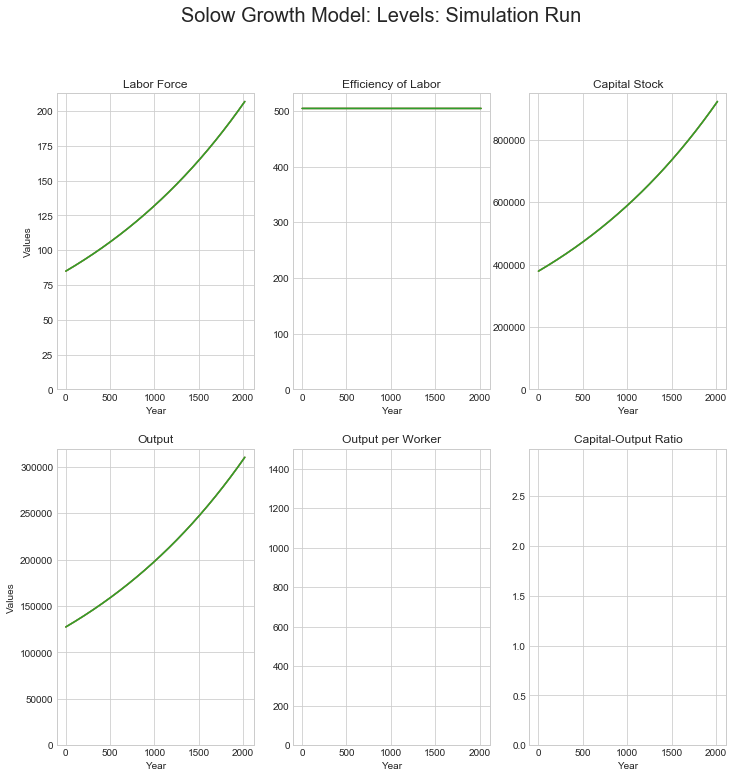

 
 
 
206.88800009399387  = Labor Force in Year 2018


In [49]:
# cell with n = 0.000440796, h = 0.000146932, 0 - 2019

output = sgm_malthus2_10000yr_run(L0=85, E0=504.41000009638856, initial_year = 0,
    T = 2019, n = 0.000440796, h = 0.000146932,  graphs = "LEVELS", remind = "NO") 

print(" ")
print(" ")
print(" ")
print(output["df"].Labor[2018], " = Labor Force in Year 2018")

LF_year0 = output["df"].Labor[2018]

# output["df"]

What if there had been no improvement in the useful human knowledge stock from the year 1000 BC to the year 1000, and yet population growth had continued at 0.044% per year?

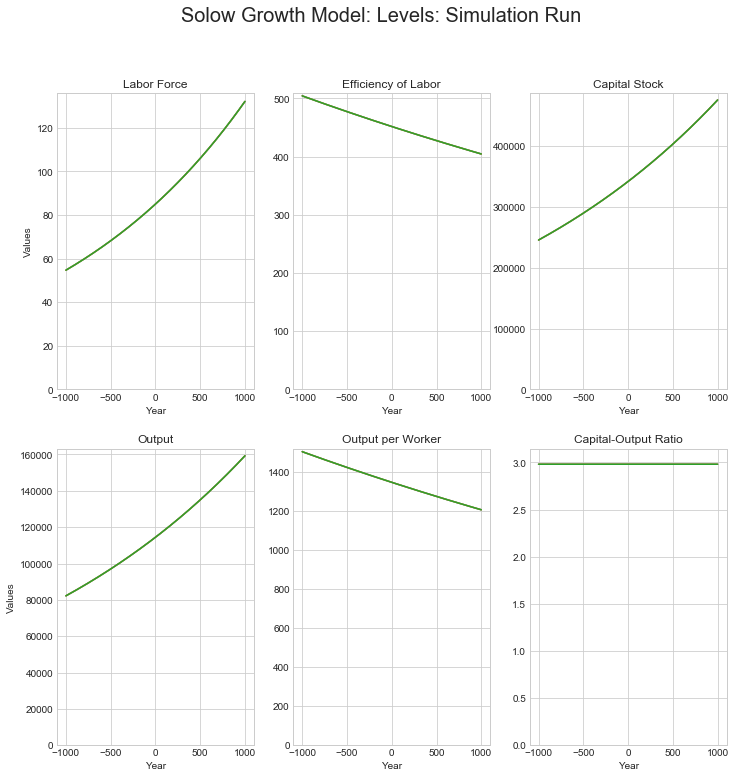

The blue line is the initial balanced-growth path;
the orange line is the alternative balanced growth path;
the green line is the track of the economy as it transitions
from the baseline to the alternative BGP.
 
0.000440796 is the baseline labor-force growth rate
0.0 is the baseline human knowledge growth rate
0.15 is the baseline savings rate
 
0.000440796 is the alternative labor-force growth rate
0.0 is the alternative human knowledge growth rate
0.15 is the alternative savings-investment rate
 
0.05 is the depreciation rate
0.5 is the orientation-of-growth-toward-capital parameter
 
 
 
Year   Labor Force    Output per Worker
-1000   54.7    1503.2903347929348
-500   68.18753040035918    1422.7004092100112
0   85.0007185027405    1346.4308307717106
500   105.95958093159042    1274.2499898901717
1000   132.0863280801124    1205.9386933411713


In [50]:
# cell with n = 0.000440796, h = 0.0, 1000 BC - 1000

output = sgm_malthus2_10000yr_run(L0=54.7, E0=504.41000009638856, initial_year = -1000,
    T = 2001, n = 0.000440796, h = 0.0,  graphs = "LEVELS", remind = "YES") 

print(" ")
print(" ")
print(" ")
print("Year   Labor Force    Output per Worker")
for t in [-1000, -500, 0, 500, 1000]:
    print(t, " ", output["df"].Labor[t], "  ", output["df"].Output_per_Worker[t])

### (Task D) Making Labor-Force Growth Dependent on Living Standards

In [18]:
# HERE WE HAVE A THIRD MALTHUSIAN FUNCTION

# MAKING THE RATE OF GROWTH OF THE EFFICIENCY OF LABOR
# DEPEND ON THE RATE OF GROWTH OF THE STOCK OF USEFUL
# KNOWLEDGE AND THE RATE OF GROWTH OF POPULATION
#
# might as well put "check that common libraries are active"
# as a default header in every long python code cell...

import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
import numpy as np
%matplotlib inline

# we are going to want to see what happens for lots of
# different model parameter values and base conditions,
# so stuff our small simulation program inside a function, so 
# we can then invoke it with a single line...
#
# we are going to assume the economy starts on its base
# balanced growth path...
#
# we are going to want to keep track not just of what the
# economy's variables are at each point in time, but also 
# what the base and alternative balanced-growth path 
# values of variables are. Given the parameters, the new BGP 
# is attracting the economy to it at the speed (1-α)(n+g+δ), 
# closing that fraction of the gap between its current state 
# and the balanced growth path attractor every period...
# 
# Required variables are:

# * L0: the initial level of the labor force
# * E0: the initial level of the efficiency-of-labor
# * K0: the initial value of the capital stock
# * initial_year: the initial calendar year of the civilization corresponding to t=0
# * T: the number of years for which the simulation will run.
# 
# Plus it can have:
# 
# * y_bar: "subsistence" level of output per worker at which population
#    growth averages zero (default: 1500)
# * beta: responsiveness of population growth—it rises—to increases in 
#     real incomes before the demographic transition kicks in $ \beta $
#     (default: 0.00002)
# * y_peak: maximum population growth level of real income (default: 3500)
# * eta: responsiveness of population growth—it falls—to increases in
#     real incomes after the demographic gransition kicks in $ \eta $
#     (default: 2)
# * R: unchanging stock of natural resources
# * h: rate of growth of the ideas stock—the stock of useful human knowledge 
#       (default value: 0)
# * gamma: orientation of the efficiency of labor towards ideas $ \gamma $ (default value: 3)
# * s: savings-investment rate (default value: 0.15) 
# * alpha: orientation-of-growth-toward-capital parameter $ \alpha $ (default value: 0.5)
# * delta: deprecation rate on capital parameter $ \delta $ (default value: 0.05)
# * Delta_s=0, Delta_g=0, Delta_h=0: differentials for alternative scenarios (default values: 0)
# * graphs: graphs plotted (default value: "LEVELS"; alternatives: "LOGS", "NONE")
# * remind: remind us of parameter values for the baseline and alternative scenarios (YES/NO)

def sgm_malthus3_10000yr_run(L0, E0, K0, initial_year, T , y_bar = 1500, beta = 0.00001, 
    y_peak = 3500, eta = 2, gamma = 3, h= 0.00, s=0.15, alpha=0.5, delta=0.05, Delta_s=0, 
    Delta_h=0, graphs="LEVELS", remind = "YES"): #changed from second Malthusian function

    sg_df = pd.DataFrame(index=range(T),columns=['Year',
        'Labor', 
        'Efficiency',
        'Capital',
        'Output',
        'Output_per_Worker',
        'Capital_Output_Ratio',
        'Population',
        'BGP_base_Labor',
        'BGP_base_Efficiency',
        'BGP_base_Output',
        'BGP_base_Output_per_Worker',
        'BGP_base_Capital_Output_Ratio',
        'BGP_base_Capital',
        'BGP_base_Population',
        'BGP_alt_Labor',
        'BGP_alt_Efficiency',
        'BGP_alt_Output',
        'BGP_alt_Output_per_Worker',
        'BGP_alt_Capital_Output_Ratio',
        'BGP_alt_Capital',
        'BGP_alt_Population'],
        dtype='float')
    
    Y0 = (K0**alpha)*(E0*L0)**(1-alpha) #added from 2MF
    YoverL0 = (K0**alpha)*(E0)**(1-alpha)*L0**(-alpha) # changed from 2MF
    
    if ((YoverL0-y_bar) < y_peak-y_bar):
        n = beta*(YoverL0-y_bar) # added from second Malthusian function
    if (YoverL0 > y_peak):
        n = beta*(y_peak-y_bar)*(YoverL0/y_peak)**(-eta) # added from second Malthusian function

    g = ((gamma * h - n)/(1+gamma)) # added from first Malthusian function
    Delta_g = (gamma * Delta_h)/(1+gamma) # added from first Malthusian function

    sg_df.Year[0] = initial_year
    sg_df.Labor[0] = L0
    sg_df.Population[0] = 2 * L0
    sg_df.BGP_base_Labor[0] = L0
    sg_df.BGP_base_Population[0] = 2 * sg_df.BGP_base_Labor[0]
    sg_df.BGP_alt_Labor[0] = L0
    sg_df.Efficiency[0] = E0
    sg_df.BGP_base_Efficiency[0] = E0
    sg_df.BGP_alt_Efficiency[0] = E0
    sg_df.BGP_alt_Population[0] = 2 * sg_df.BGP_alt_Labor[0]

    KoverY_base_steady_state = s/(n+g+delta)
    YoverL_base_steady_state = ((s/(n+g+delta))**(alpha/(1-alpha)) 
        * E0)
    KoverL_base_steady_state = (YoverL_base_steady_state *
        KoverY_base_steady_state)
    
    sg_df.Capital[0] = K0 #changed from 2MF
    sg_df.Output[0] = (K0**alpha)*(E0*L0)**(1-alpha) #changed from 2MF
    sg_df.Output_per_Worker[0] == (K0**alpha)*(E0)**(1-alpha)*L0**(-alpha) # changed from 2MF
    sg_df.Capital_Output_Ratio[0] = sg_df.Capital[0]/sg_df.Output[0]
    
    sg_df.BGP_base_Capital_Output_Ratio[0] = (s / (n + g + delta))
    sg_df.BGP_base_Output_per_Worker[0] = (K0**alpha)*(E0)**(1-alpha)*L0**(-alpha) # changed from 2MF
    sg_df.BGP_base_Output[0] = (K0**alpha)*(E0*L0)**(1-alpha) #changed from 2MF
    sg_df.BGP_base_Capital[0] = K0 #changed from 2MF
    
    sg_df.BGP_alt_Capital_Output_Ratio[0] = ((s + Delta_s) / 
        (n + g + Delta_g + delta))
    sg_df.BGP_alt_Output_per_Worker[0] = (K0**alpha)*(E0)**(1-alpha)*L0**(-alpha) # changed from 2MF
    sg_df.BGP_alt_Output[0] = (K0**alpha)*(E0*L0)**(1-alpha) # changed from 2MF
    sg_df.BGP_alt_Capital[0] = K0 #changed from 2MF
    
    for i in range(T):
        g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
        Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        if ((sg_df.Output_per_Worker[i]-y_bar) < y_peak-y_bar):
            n = beta*(sg_df.Output_per_Worker[i]-y_bar) # added from second Malthusian function
        if (sg_df.Output_per_Worker[i] > y_peak):
            n = beta*(y_peak-y_bar)*(sg_df.Output_per_Worker[i]/y_peak)**(-eta) # added from second Malthusian function 
        sg_df.Year[i+1] = sg_df.Year[i]+1
        sg_df.Labor[i+1] = (sg_df.Labor[i] * np.exp(n))
        sg_df.Population[i+1] = 2 * sg_df.Labor[i+1]
        sg_df.Efficiency[i+1] = (sg_df.Efficiency[i] * np.exp(g + Delta_g))
        KoverY_current = sg_df.Capital[i]/sg_df.Output[i]
        sg_df.Capital[i+1] = (sg_df.Capital[i] * np.exp((s+Delta_s)/ 
            KoverY_current - delta))
        sg_df.Output[i+1] = (sg_df.Capital[i+1]**alpha * 
            (sg_df.Labor[i+1] * sg_df.Efficiency[i+1])**(1-alpha))
        sg_df.Output_per_Worker[i+1] = sg_df.Output[i+1]/sg_df.Labor[i+1]
        sg_df.Capital_Output_Ratio[i+1] = (sg_df.Capital[i+1]/
            sg_df.Output[i+1])

    g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
    Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
    if ((YoverL0-y_bar) < y_peak-y_bar):
        n = beta*(YoverL0-y_bar) # added from second Malthusian function
    if (YoverL0 > y_peak):
        n = beta* (y_peak-y_bar)*(YoverL0/y_peak)**(-eta) # added from second Malthusian function
        
    for i in range(T):
        sg_df.BGP_base_Labor[i+1] = (sg_df.BGP_base_Labor[i] * np.exp(n))
        g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
        Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        if ((sg_df.BGP_base_Output_per_Worker[i]-y_bar) < y_peak-y_bar):
            n = beta*(sg_df.BGP_base_Output_per_Worker[i]-y_bar) # added from second Malthusian function
        if (sg_df.BGP_base_Output_per_Worker[i] > y_peak):
            n = beta*(y_peak-y_bar)*(sg_df.BGP_base_Output_per_Worker[i]/y_peak)**(-eta) # added from second Malthusian function 
        sg_df.BGP_base_Population[i+1] = 2 * sg_df.BGP_base_Labor[i+1]
        sg_df.BGP_base_Efficiency[i+1] = (sg_df.BGP_base_Efficiency[i] * np.exp(g))
        sg_df.BGP_base_Capital_Output_Ratio[i+1] = (s / (n + g + delta))
        sg_df.BGP_base_Output_per_Worker[i+1] = sg_df.BGP_base_Efficiency[i+1] * (
            sg_df.BGP_base_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_base_Output[i+1] = (sg_df.BGP_base_Output_per_Worker[i+1] * 
            sg_df.BGP_base_Labor[i+1])
        sg_df.BGP_base_Capital[i+1] = (s / (n + g + delta))**(1/(1-alpha)) * (
            sg_df.Efficiency[i+1] * sg_df.Labor[i+1])

    g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
    Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
    if ((YoverL0-y_bar) < y_peak-y_bar):
        n = beta*(YoverL0-y_bar) # added from second Malthusian function
    if (YoverL0 > y_peak):
        n = beta* (y_peak-y_bar)*(YoverL0/y_peak)**(-eta) # added from second Malthusian function
        
    for i in range(T):
        sg_df.BGP_alt_Labor[i+1] = (sg_df.BGP_alt_Labor[i] * np.exp(n))
        g = (gamma * h - n)/(1+gamma)   # added from first Malthusian function
        Delta_g = (gamma * Delta_h)/(1+gamma)   # added from first Malthusian function
        if ((sg_df.BGP_alt_Output_per_Worker[i]-y_bar) < y_peak-y_bar):
            n = beta*(sg_df.BGP_alt_Output_per_Worker[i]-y_bar) # added from second Malthusian function
        if (sg_df.BGP_alt_Output_per_Worker[i] > y_peak):
            n = beta*(y_peak-y_bar)*(sg_df.BGP_alt_Output_per_Worker[i]/y_peak)**(-eta) # added from second Malthusian function 
        sg_df.BGP_alt_Population[i+1] = 2 * sg_df.BGP_alt_Labor[i+1]
        sg_df.BGP_alt_Efficiency[i+1] = (sg_df.BGP_alt_Efficiency[i] * np.exp(g+Delta_g))
        sg_df.BGP_alt_Capital_Output_Ratio[i+1] = ((s+ Delta_s) / 
            (n + g + Delta_g + delta))
        sg_df.BGP_alt_Output_per_Worker[i+1] = sg_df.BGP_alt_Efficiency[i+1] * (
            sg_df.BGP_alt_Capital_Output_Ratio[i+1]**(alpha/(1 - alpha)))
        sg_df.BGP_alt_Output[i+1] = (sg_df.BGP_alt_Output_per_Worker[i+1] * 
            sg_df.BGP_alt_Labor[i+1])
        sg_df.BGP_alt_Capital[i+1] = ((s + Delta_s) / (n + g + Delta_g + delta))**(1/(1-alpha)) * (
            sg_df.BGP_alt_Efficiency[i+1] * sg_df.BGP_alt_Labor[i+1])  

    sg_df.Population = 2 * sg_df.Labor
    
    sg_df = sg_df.set_index("Year")
        
    if (graphs == "LEVELS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
#        sg_df.BGP_base_Labor.plot(ax = ax1, title = "BGP (base) Labor")
#        sg_df.BGP_alt_Labor.plot(ax = ax1, title = "BGP (alt) Labor")
        sg_df.Labor.plot(ax = ax1, title = "Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
#        sg_df.BGP_base_Efficiency.plot(ax = ax2, title = "BGP (base) Efficiency")
#        sg_df.BGP_alt_Efficiency.plot(ax = ax2, title = "BGP (alt) Efficiency")
        sg_df.Efficiency.plot(ax = ax2, title = "Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
#        sg_df.BGP_base_Capital.plot(ax = ax3, title = "BGP (base) Capital Stock")
#        sg_df.BGP_alt_Capital.plot(ax = ax3, title = "BGP (alt) Capital Stock")
        sg_df.Capital.plot(ax = ax3, title = "Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
#        sg_df.BGP_base_Output.plot(ax = ax4, title = "BGP (base) Output")
#        sg_df.BGP_alt_Output.plot(ax = ax4, title = "BGP (alt) Output")
        sg_df.Output.plot(ax = ax4, title = "Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
#        sg_df.BGP_base_Output_per_Worker.plot(ax = ax5, title = "BGP (base) Output per Worker")
#        sg_df.BGP_alt_Output_per_Worker.plot(ax = ax5, title = "BGP (alt) Output per Worker")
        sg_df.Output_per_Worker.plot(ax = ax5, title = "Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
#        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
#            title = "BGP (base) Capital-Output Ratio")
#        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
#            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Levels: Simulation Run', size = 20)

        plt.show()
        
    if (graphs == "LOGS"):
        fig = plt.figure(figsize=(12, 12))

        ax1 = plt.subplot(2,3,1)
#        np.log(sg_df.BGP_base_Labor).plot(ax = ax1, title = "BGP (base) Labor")
#        np.log(sg_df.BGP_alt_Labor).plot(ax = ax1, title = "BGP (alt) Labor")
        np.log(sg_df.Labor).plot(ax = ax1, title = "Log Labor Force")
        plt.ylabel("Values")
        plt.ylim(0, )

        ax2 = plt.subplot(2,3,2)
#        np.log(sg_df.BGP_base_Efficiency).plot(ax = ax2, title = "BGP (base) Efficiency")
#        np.log(sg_df.BGP_alt_Efficiency).plot(ax = ax2, title = "BGP (alt) Efficiency")
        np.log(sg_df.Efficiency).plot(ax = ax2, title = "Log Efficiency of Labor")
        plt.ylim(0, )
    
        ax3 = plt.subplot(2,3,3)
#        np.log(sg_df.BGP_base_Capital).plot(ax = ax3, title = "BGP (base) Capital Stock")
#        np.log(sg_df.BGP_alt_Capital).plot(ax = ax3, title = "BGP (alt) Capital Stock")
        np.log(sg_df.Capital).plot(ax = ax3, title = "Log Capital Stock")
        plt.ylim(0, )

        ax4 = plt.subplot(2,3,4)
#        np.log(sg_df.BGP_base_Output).plot(ax = ax4, title = "BGP (base) Output")
#        np.log(sg_df.BGP_alt_Output).plot(ax = ax4, title = "BGP (alt) Output")
        np.log(sg_df.Output).plot(ax = ax4, title = "Log Output")
        plt.ylabel("Values")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax5 = plt.subplot(2,3,5)
#        np.log(sg_df.BGP_base_Output_per_Worker).plot(ax = ax5, title = "BGP (base) Output per Worker")
#        np.log(sg_df.BGP_alt_Output_per_Worker).plot(ax = ax5, title = "BGP (alt) Output per Worker")
        np.log(sg_df.Output_per_Worker).plot(ax = ax5, title = "Log Output per Worker")
        plt.xlabel("Year")
        plt.ylim(0, )

        ax6 = plt.subplot(2,3,6)
#        sg_df.BGP_base_Capital_Output_Ratio.plot(ax = ax6, 
#            title = "BGP (base) Capital-Output Ratio")
#        sg_df.BGP_alt_Capital_Output_Ratio.plot(ax = ax6, 
#            title = "BGP (alt) Capital-Output Ratio")
        sg_df.Capital_Output_Ratio.plot(ax = ax6, 
            title = "Capital-Output Ratio")
        plt.xlabel("Year")
        plt.ylim(0, )

        plt.suptitle('Solow Growth Model: Logs: Simulation Run', size = 20)

        plt.show()
    
    if ((graphs != "LEVELS") and (graphs != "LOGS")):
        fig = "NONE"
        
    if (remind == "YES"):      
        print("The blue line is the initial balanced-growth path;")
        print("the orange line is the alternative balanced growth path;")
        print("the green line is the track of the economy as it transitions")
        print("from the baseline to the alternative BGP.")
        print(" ")
    
        print(h, "is the baseline human knowledge growth rate")
        print(s, "is the baseline savings rate")
        print(" ")
          
        print(h + Delta_h, "is the alternative human knowledge growth rate")
        print(s + Delta_s, "is the alternative savings-investment rate")
        print(" ")
    
        print(delta, "is the depreciation rate")
        print(alpha, "is the orientation-of-growth-toward-capital parameter")
    
    
    SGM_dict = {}
    SGM_dict["df"] = sg_df
    SGM_dict["plots"] = fig
    
    return SGM_dict

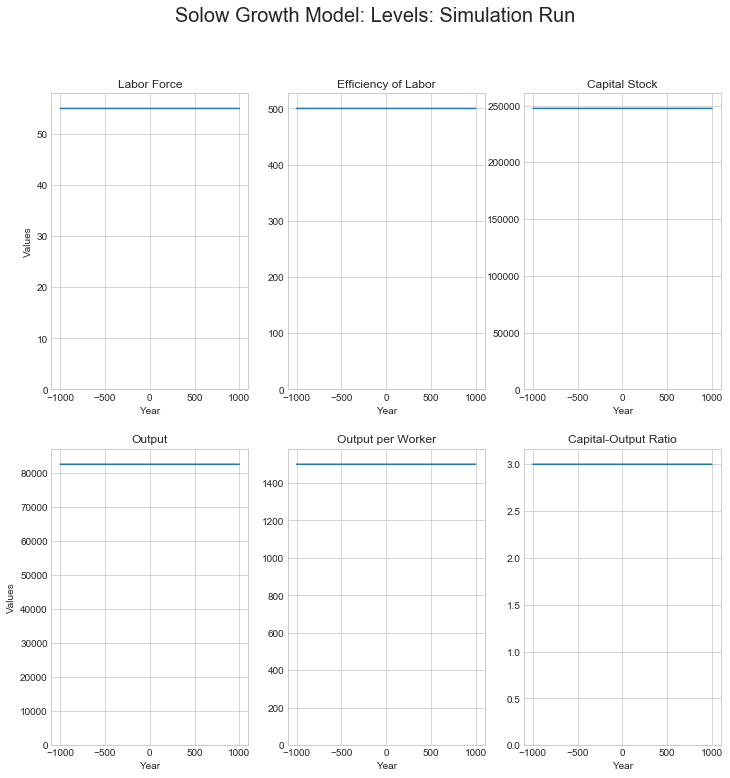

In [20]:
# cell with endogenous population growth but no growth in ideas
# stock after 1000 BC, h = 0.0, 1000 BC - 1000

output = sgm_malthus3_10000yr_run(L0=55, E0=500, K0=3*1500*55, 
    initial_year = -1000, T = 2001, h = 0.0,  
    graphs = "LEVELS", remind = "NO") 

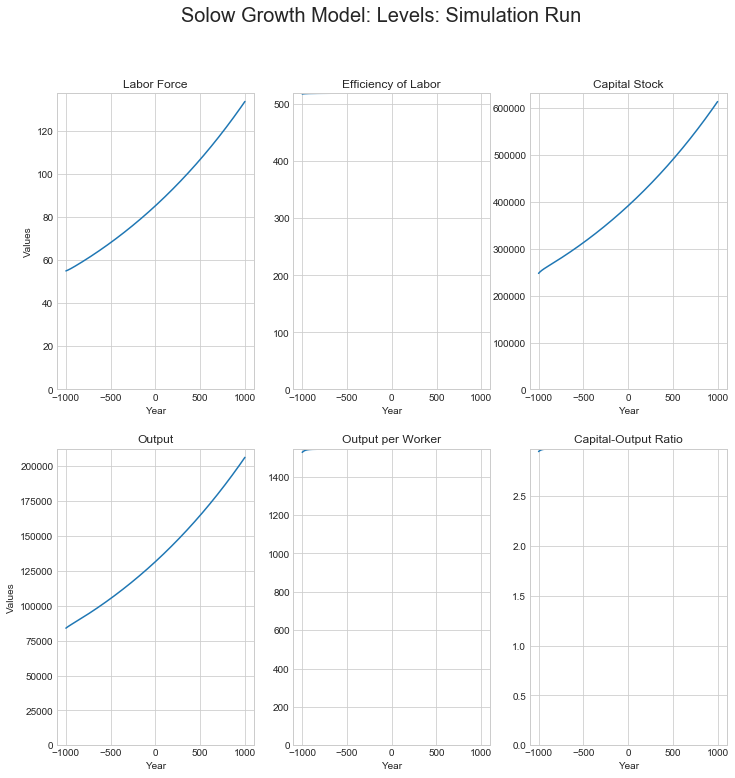

 
 
 
Year Labor Force  Output per Worker
0 85.22124576164528 1544.8953166922595


In [28]:
# cell with endogenous population growth and with growth in ideas
# stock after 1000 BC at h = 0.00015, 1000 BC - 1000

output = sgm_malthus3_10000yr_run(L0=55, E0=518, K0=3*1500*55, 
    initial_year = -1000, T = 2001, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 

print(" ")
print(" ")
print(" ")
print("Year Labor Force  Output per Worker")
print(0, output["df"].Labor[0], output["df"].Output_per_Worker[0])

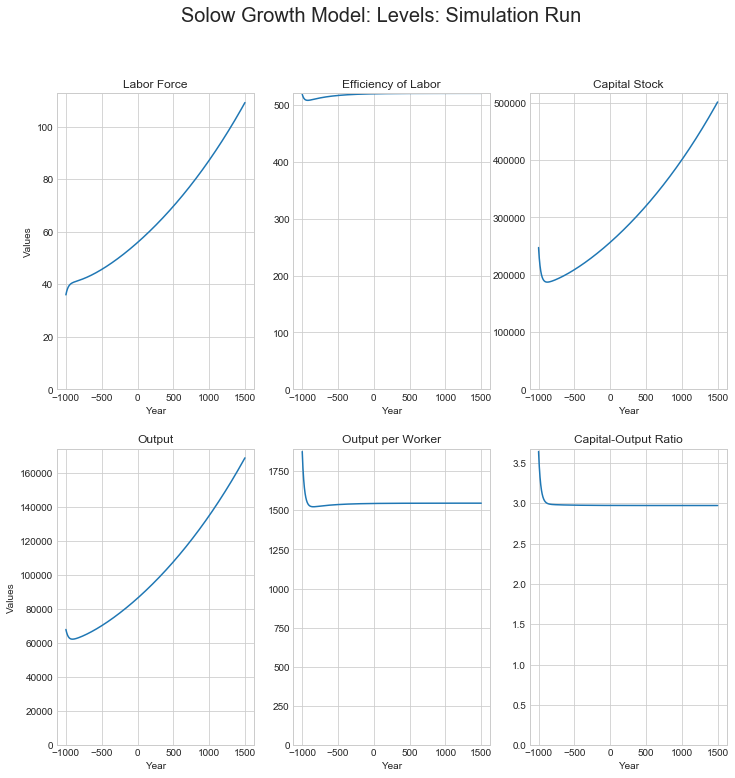

The blue line is the initial balanced-growth path;
the orange line is the alternative balanced growth path;
the green line is the track of the economy as it transitions
from the baseline to the alternative BGP.
 
0.00015 is the baseline human knowledge growth rate
0.15 is the baseline savings rate
 
0.00015 is the alternative human knowledge growth rate
0.15 is the alternative savings-investment rate
 
0.05 is the depreciation rate
0.5 is the orientation-of-growth-toward-capital parameter
 
 
 
Year Labor Force  Output per Worker
0 55.908520571314675 1543.0888230796077


In [29]:
# What if a great plague had struck and had wiped out 1/3 of the 
# world's population in 1000 BC, after which ideas growth at 
# h = 0.00015, 1000 BC - 1500?

output = sgm_malthus3_10000yr_run(L0=36, E0=518, K0=3*1500*55, 
    initial_year = -1000, T = 2501, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 

print(" ")
print(" ")
print(" ")
print("Year Labor Force  Output per Worker")
print(0, output["df"].Labor[0], output["df"].Output_per_Worker[0])

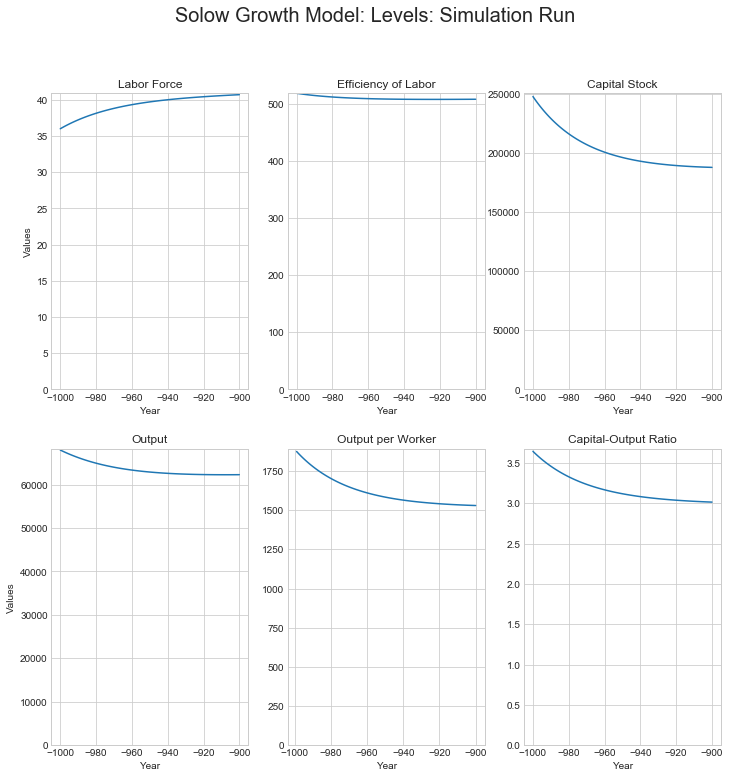

In [32]:
# What if a great plague had struck and had wiped out 1/3 of the 
# world's population in 1000 BC, after which ideas growth at 
# h = 0.0002, 1000 BC - 1500? Looking at the first 100 years of
# the transition...

output = sgm_malthus3_10000yr_run(L0=36, E0=518, K0=3*1500*55, 
    initial_year = -1000, T = 101, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 

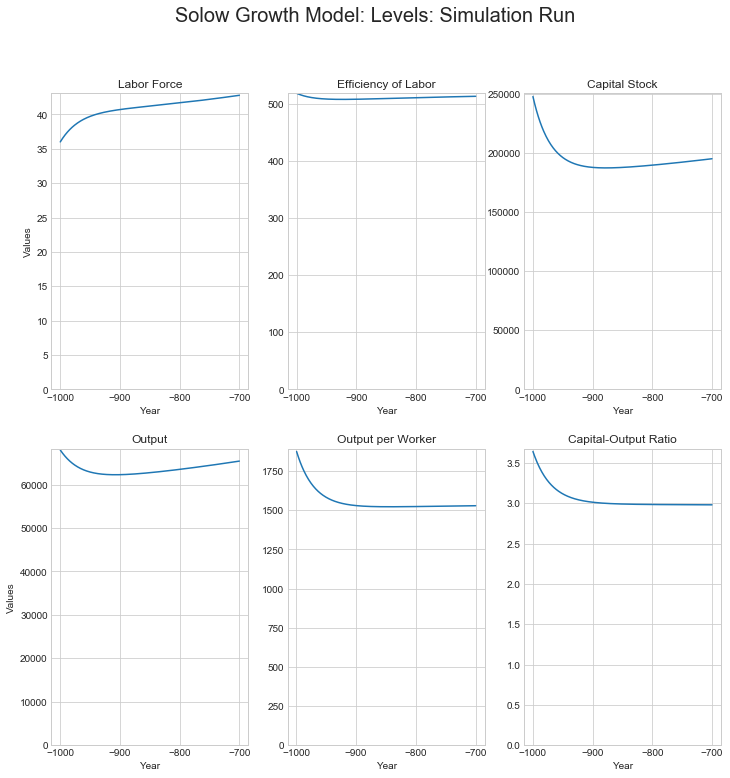

In [33]:
# What if a great plague had struck and had wiped out 1/3 of the 
# world's population in 1000 BC, after which ideas growth at 
# h = 0.0002, 1000 BC - 1500? Looking at the first 300 years of
# the transition...

output = sgm_malthus3_10000yr_run(L0=36, E0=518, K0=3*1500*55, 
    initial_year = -1000, T = 301, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 


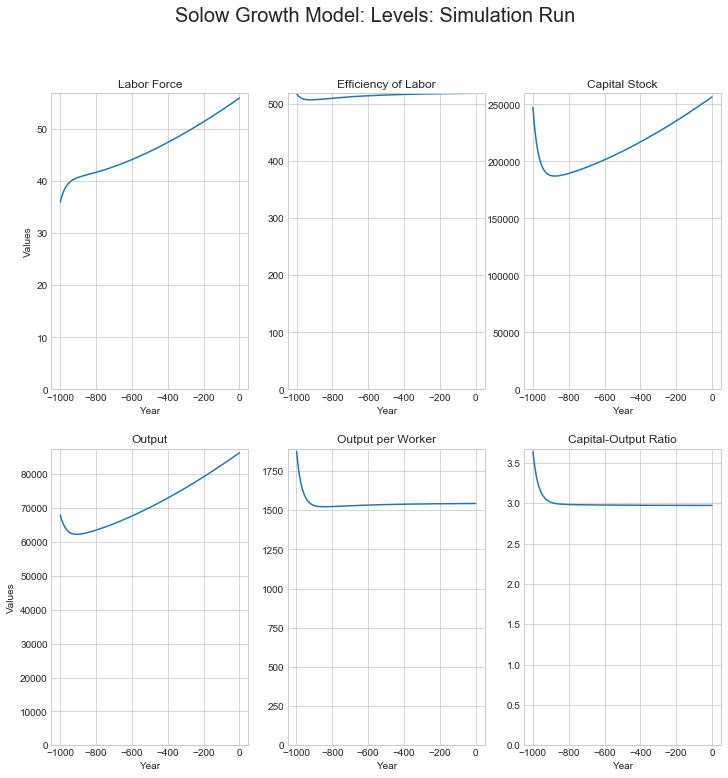

In [34]:
# What if a great plague had struck and had wiped out 1/3 of the 
# world's population in 1000 BC, after which ideas growth at 
# h = 0.0002, 1000 BC - 1500? Looking at the first 1000 years of
# the transition...

output = sgm_malthus3_10000yr_run(L0=36, E0=518, K0=3*1500*55, 
    initial_year = -1000, T = 1001, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 


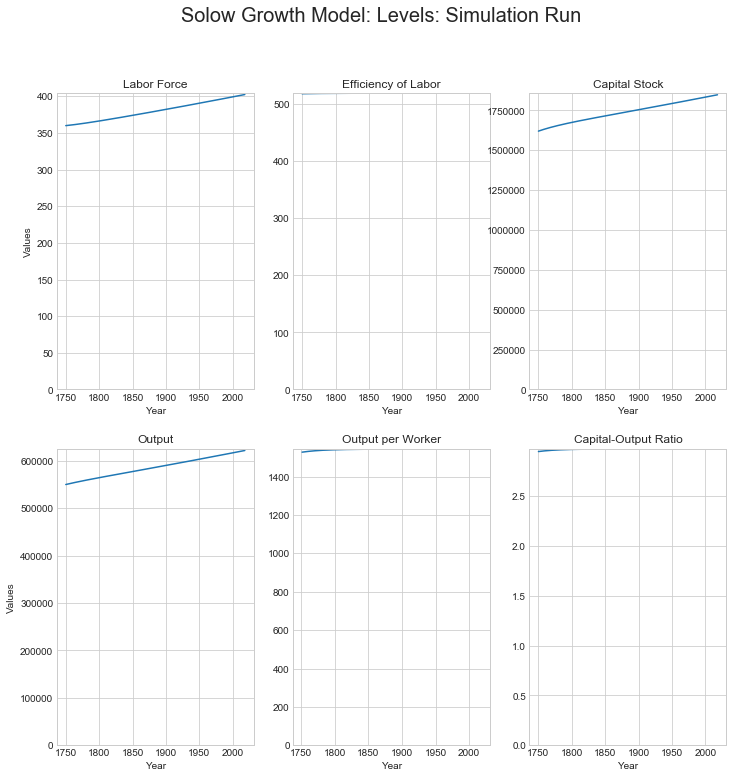

In [43]:
# Looking forward from 1750 with an h = 0.00015 and an initial
# labor force of 360 million (population of 720 million)...

output = sgm_malthus3_10000yr_run(L0=360, E0=518, K0=3*1500*360, 
    initial_year = 1750, T = 269, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 


### (Task E) Can We Understand the Transition to Modern Economic Growth?

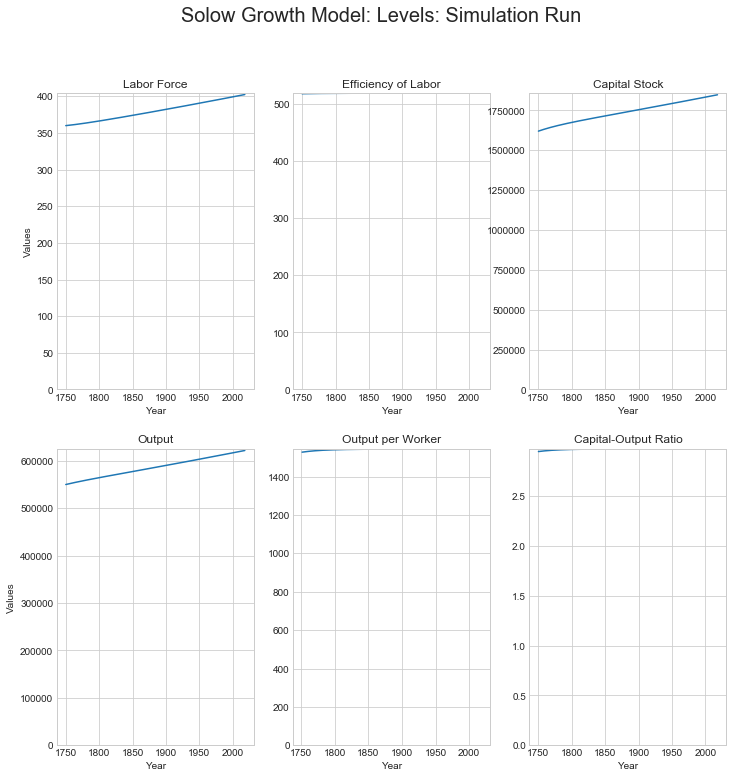

In [43]:
# Looking forward from 1750 with an h = 0.00015 and an initial
# labor force of 360 million (population of 720 million)...

output = sgm_malthus3_10000yr_run(L0=360, E0=518, K0=3*1500*360, 
    initial_year = 1750, T = 269, h = 0.00015,  
    graphs = "LEVELS", remind = "NO") 


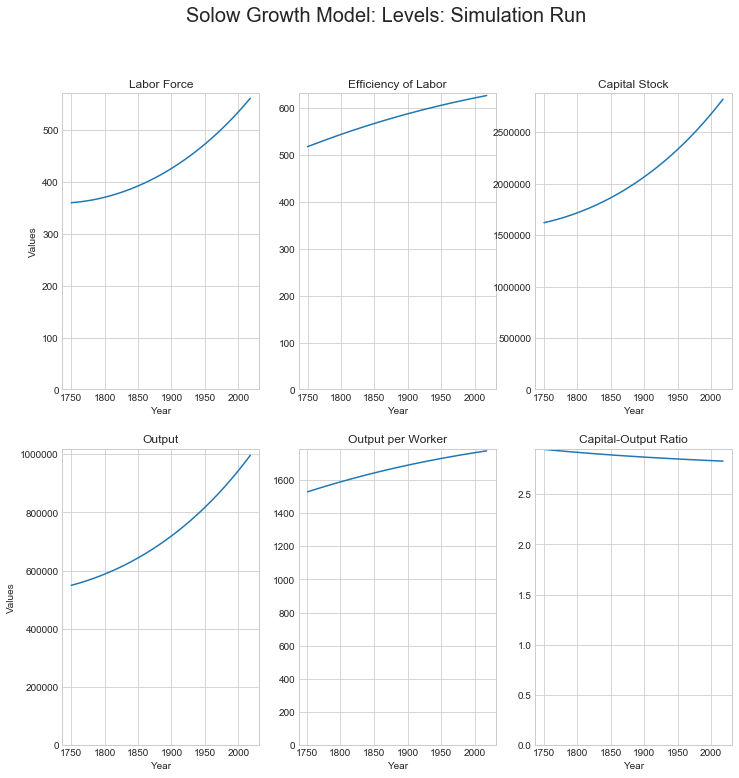

In [45]:
# Looking forward from 1750 with an initial labor force of 360 million 
# (population of 720 million). Suppose we amplify h tenfold:
# h = 0.0015...

output = sgm_malthus3_10000yr_run(L0=360, E0=518, K0=3*1500*360, 
    initial_year = 1750, T = 269, h = 0.0015,  
    graphs = "LEVELS", remind = "NO") 


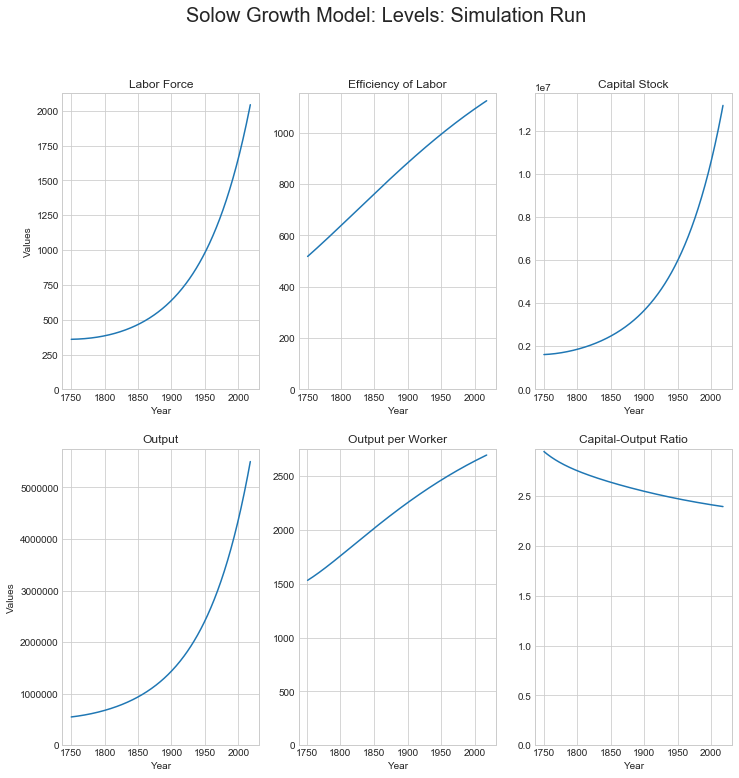

In [46]:
# Looking forward from 1750 with an initial labor force of 360 million 
# (population of 720 million). Suppose we amplify h forty-fold:
# h = 0.006...

output = sgm_malthus3_10000yr_run(L0=360, E0=518, K0=3*1500*360, 
    initial_year = 1750, T = 269, h = 0.006,  
    graphs = "LEVELS", remind = "NO") 


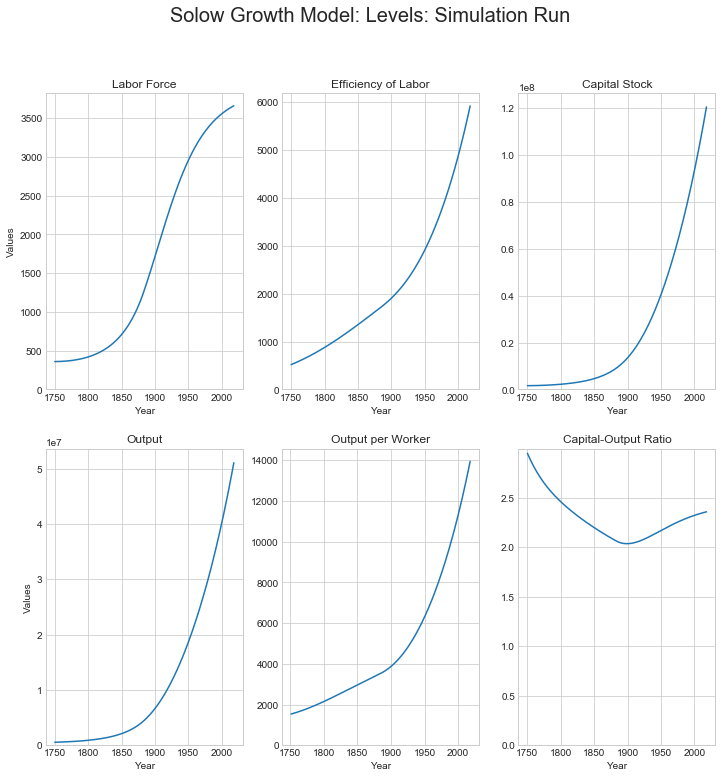

In [47]:
# Looking forward from 1750 with an initial labor force of 360 million 
# (population of 720 million). Suppose we amplify h a hundredfold:
# h = 0.015...

output = sgm_malthus3_10000yr_run(L0=360, E0=518, K0=3*1500*360, 
    initial_year = 1750, T = 269, h = 0.015,  
    graphs = "LEVELS", remind = "NO") 


### (Task F) What Is Our Likely Destiny?

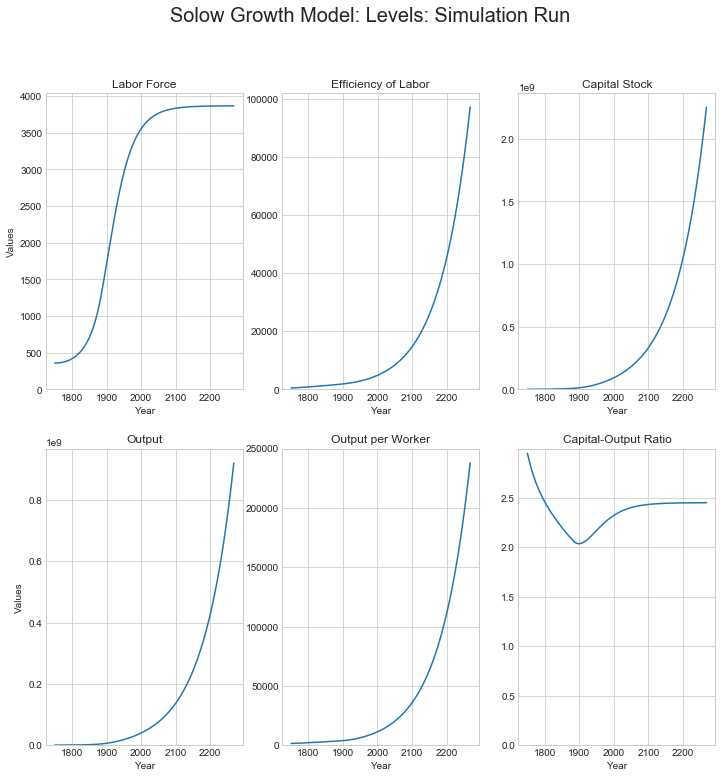

In [48]:
# What's the projection further into the future?

output = sgm_malthus3_10000yr_run(L0=360, E0=518, K0=3*1500*360, 
    initial_year = 1750, T = 519, h = 0.015,  
    graphs = "LEVELS", remind = "NO") 


### (Task G) Savings and Investment**

_Would an increase in the saving and investment share of U.S. total output raise or lower output per worker growth and living standards? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

### (Task H) Escape from the Malthusian Trap**

_Suppose somebody who hasn’t taken any economics courses asks you why humanity escaped from the Malthusian trap of very low standards of living and slow population growth rates, which nevertheless put pressure on available natural resources and kept output per worker from rising, in which humanity found itself between 8000 BC and AD 1800. What answer would you give? Double-click on this markdown cell and write your answer below:_

&nbsp;

<font color="blue">ANSWER: </font>

----

&nbsp;

### (Task I) Zero Population Growth**

Many observers project that by the end of the twenty-first century the population of the United States will be stable. Using the Solow growth model, what would such a downward shift in the growth rate of the labor force do to the growth of output per worker and to the growth of total output if zero labor force growth came suddenly and permanently in 2050? Consider both the effect on the balanced-growth equilibrium path and the transition from the “old” positive population growth to the “new” zero population growth balanced-growth path.

Answer this question by setting the appropriate variables to their values in the code cell below. The initial balanced growth path steady state of the economy has:

* Rate of population growth n = 1% per year
* Rate of efficiency-of-labor growth g = 1.5% per year
* Depreciation rate $ \delta $ (delta) = 3% per year
* Savings-investment effort as a share of output s = 22% per year
* Diminishing returns to investment production function parameter $ \alpha $ (alpha) = 0.5
* Level of the efficiency of labor today $ E_{2018} = 65000 $

In [ ]:
Output_per_worker2050 =
Output_per_worker2100 =
Output_per_worker2150 =
Capital_output_ratio2050 =
Capital_output_ratio2100 =
Capital_output_ratio2150 =

In [ ]:
ok.grade('q01')

In [ ]:
_ = ok.submit()

----

&nbsp;

## Appendix: Programming Dos and Don'ts...

### A Running List...

1. **Do** restart your kernel and run cells up to your current working point every fifteen minutes or so. Yes, it takes a little time. But if you don't, sooner or later the machine's namespace will get confused, and then you will get confused about the state of the machine's namespace, and by assuming things about it that are false you will lose hours and hours...   
&nbsp;   

2. **Do** edit code cells by copying them below your current version and then working on the copy: when you break everything in the current cell (as you will), you can then go back to the old cell and start fresh...   
&nbsp;

3. **Do** exercise agile development practices: if there is a line of code that you have not tested, test it. The best way to test is to ask the machine to echo back to you the thing you have just created in its namespace to make sure that it is what you want it to be...   
&nbsp;

4. **Do** take screenshots of your error messages...   
&nbsp;

5. **Do** google your error messages: Ms. Google is your best friend here...   
&nbsp;

6. **Do not** confuse assignment ("=") and test for equality ("=="). In general, if there is an "if" anywhere nearby, you should be testing for equality. If there is not, you should be assignment a variable in your namespace to a value. **Do** curse the mathematicians 500 years ago who did not realize that in the twenty-first century it would be very convenient if we had different and not confusable symbols for equals-as-assignment and equals-as-test...   
&nbsp;

----

&nbsp;

**(Task ∞) Programming Practices**

If it strikes you that anything should be added to this list of programming dos and don'ts, please email it to me at <delong@econ.berkeley.edu>